# 第4天：概率统计基础

## 🎯 学习目标
- 理解概率 = 不确定性量化
- 掌握统计 = 数据规律发现
- 理解分布 = 数据模式描述
- 掌握抽样 = 大数据处理基础

## 📚 今日重点
- 概率基础概念
- 统计描述方法
- 常见概率分布
- 抽样与推断
- 实际应用场景


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("🎯 第4天：概率统计基础")
print("="*50)


🎯 第4天：概率统计基础


## 1️⃣ 概率基础概念

### 什么是概率？

**概率** = 事件发生的可能性大小

- **0** = 不可能发生
- **1** = 必然发生
- **0.5** = 50%的可能性

### 实际应用场景

- **天气预报**：明天有70%的概率下雨
- **股票投资**：某股票有60%的概率上涨
- **推荐系统**：用户有80%的概率喜欢这部电影
- **医疗诊断**：患者有30%的概率患有某种疾病

### 大数定律的直观理解

你已经理解了这个核心概念：
- **短期波动**：抛10次硬币，可能7次正面3次反面
- **长期稳定**：抛10000次硬币，接近5000次正面5000次反面
- **实际意义**：这就是为什么机器学习需要大量数据！


🎲 大数定律演示
抛硬币    10 次，最终正面概率: 0.3000
抛硬币   100 次，最终正面概率: 0.6100
抛硬币  1000 次，最终正面概率: 0.4920
抛硬币 10000 次，最终正面概率: 0.4995


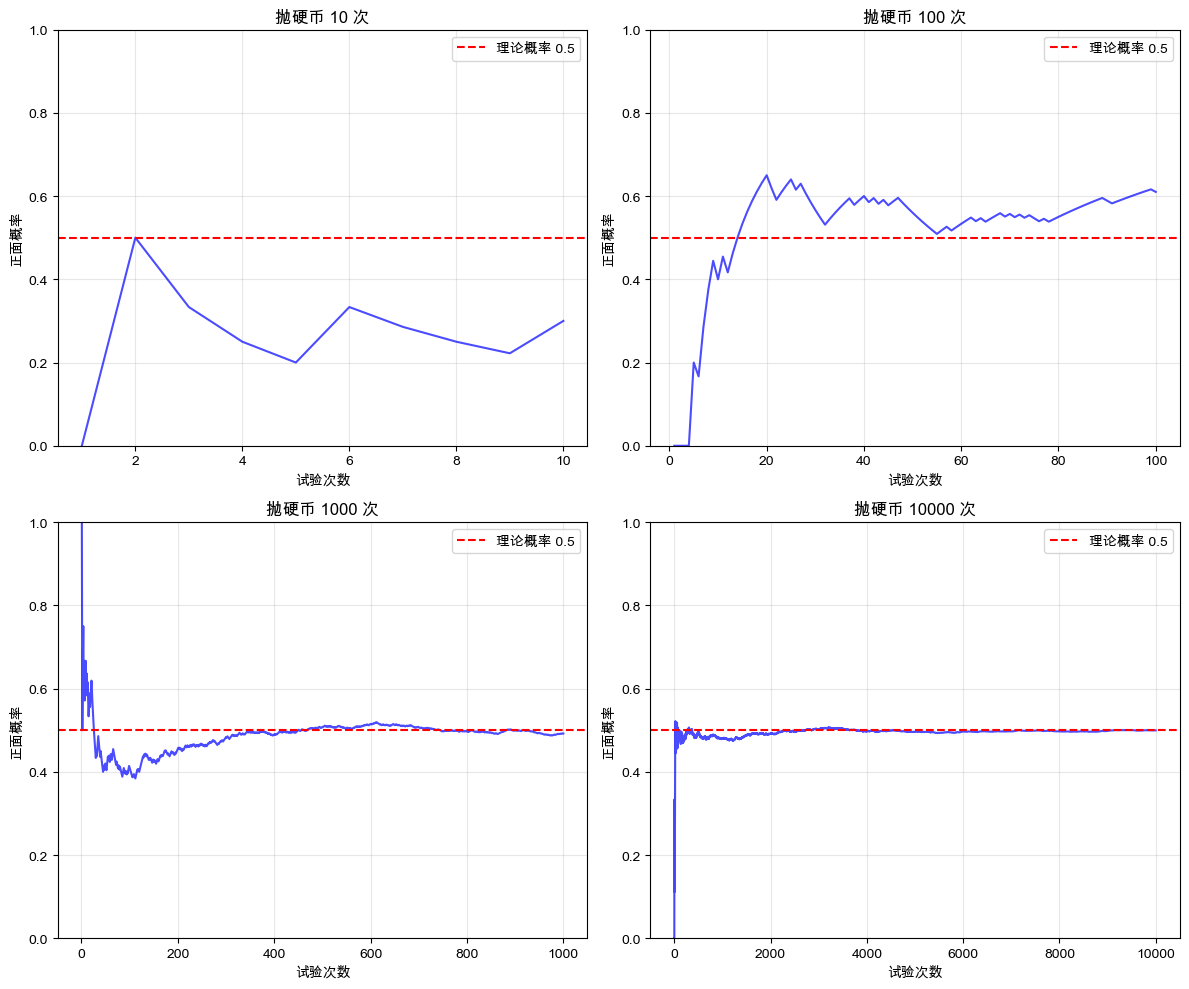


💡 观察结果:
1. 试验次数越多，概率越接近理论值0.5
2. 这就是'大数定律'的体现
3. 机器学习也是如此：数据越多，模型越准确


In [6]:
# 演示大数定律
print("🎲 大数定律演示")
print("="*50)

def demonstrate_law_of_large_numbers():
    """演示大数定律"""
    np.random.seed(42)
    
    # 不同的试验次数
    trial_sizes = [10, 100, 1000, 10000]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    for i, n_trials in enumerate(trial_sizes):
        # 模拟抛硬币
        results = np.random.choice([0, 1], size=n_trials)  # 0=反面, 1=正面
        
        # 计算累积概率
        cumulative_heads = np.cumsum(results)
        trial_numbers = np.arange(1, n_trials + 1)
        probabilities = cumulative_heads / trial_numbers
        
        # 绘图
        axes[i].plot(trial_numbers, probabilities, 'b-', alpha=0.7)
        axes[i].axhline(y=0.5, color='red', linestyle='--', label='理论概率 0.5')
        axes[i].set_title(f'抛硬币 {n_trials} 次')
        axes[i].set_xlabel('试验次数')
        axes[i].set_ylabel('正面概率')
        axes[i].set_ylim(0, 1)
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()
        
        # 显示最终概率
        final_prob = probabilities[-1]
        print(f"抛硬币 {n_trials:5d} 次，最终正面概率: {final_prob:.4f}")
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 观察结果:")
    print("1. 试验次数越多，概率越接近理论值0.5")
    print("2. 这就是'大数定律'的体现")
    print("3. 机器学习也是如此：数据越多，模型越准确")

demonstrate_law_of_large_numbers()


## 2️⃣ 统计描述方法

### 什么是统计？

**统计** = 从数据中发现规律的科学

### 核心统计量

- **均值（Mean）**：数据的"重心"
- **中位数（Median）**：排序后的中间值
- **众数（Mode）**：出现最多的值
- **标准差（Std）**：数据分散程度
- **方差（Variance）**：标准差的平方

### 为什么需要多个统计量？

不同的统计量告诉我们数据的不同特征：
- **均值**：容易受异常值影响
- **中位数**：对异常值不敏感
- **标准差**：衡量数据的"集中程度"


📊 统计量的直观理解
正态分布:
  均值: 100.29
  中位数: 100.38
  标准差: 14.68
  差异: 0.09

右偏分布:
  均值: 50.40
  中位数: 36.30
  标准差: 50.12
  差异: 14.10

带异常值:
  均值: 100.74
  中位数: 100.40
  标准差: 16.93
  差异: 0.33



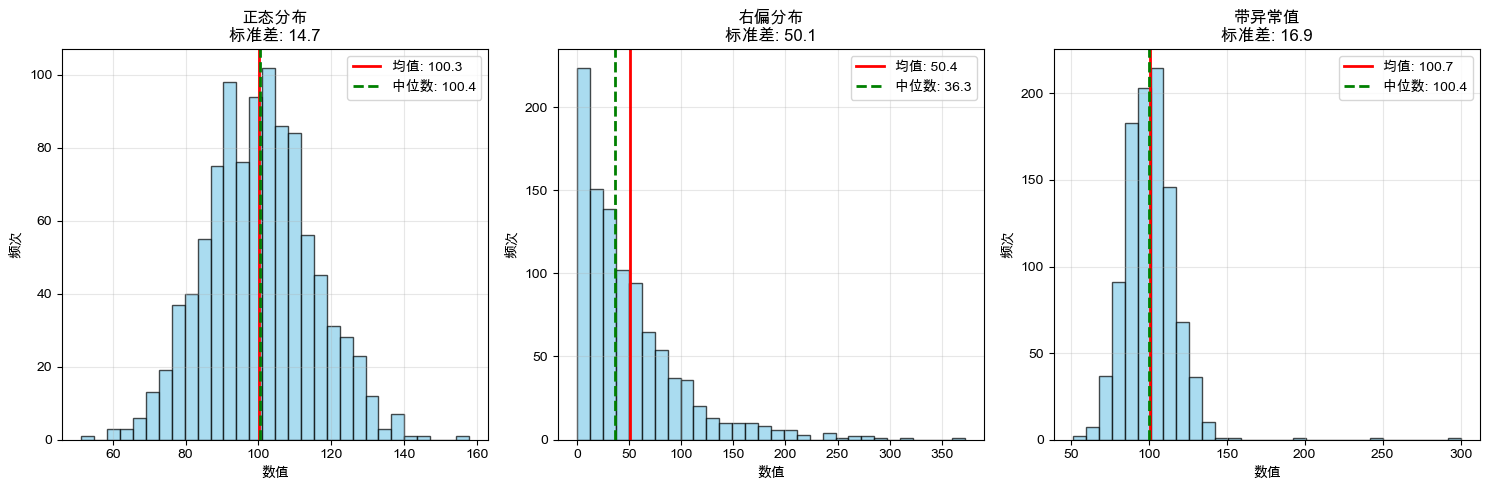

💡 关键观察:
1. 正态分布：均值 ≈ 中位数
2. 右偏分布：均值 > 中位数
3. 带异常值：均值受影响很大，中位数相对稳定
4. 标准差大 = 数据分散，标准差小 = 数据集中


In [7]:
# 统计量的直观理解
print("📊 统计量的直观理解")
print("="*50)

def demonstrate_statistics():
    """演示不同统计量的含义"""
    np.random.seed(42)
    
    # 创建三种不同特征的数据
    normal_data = np.random.normal(100, 15, 1000)  # 正态分布
    skewed_data = np.random.exponential(50, 1000)  # 右偏分布
    with_outliers = np.concatenate([normal_data, [200, 250, 300]])  # 带异常值
    
    datasets = {
        '正态分布': normal_data,
        '右偏分布': skewed_data,
        '带异常值': with_outliers
    }
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for i, (name, data) in enumerate(datasets.items()):
        # 计算统计量
        mean_val = np.mean(data)
        median_val = np.median(data)
        std_val = np.std(data)
        
        # 绘制直方图
        axes[i].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].axvline(mean_val, color='red', linestyle='-', linewidth=2, label=f'均值: {mean_val:.1f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'中位数: {median_val:.1f}')
        
        axes[i].set_title(f'{name}\n标准差: {std_val:.1f}')
        axes[i].set_xlabel('数值')
        axes[i].set_ylabel('频次')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        print(f"{name}:")
        print(f"  均值: {mean_val:.2f}")
        print(f"  中位数: {median_val:.2f}")
        print(f"  标准差: {std_val:.2f}")
        print(f"  差异: {abs(mean_val - median_val):.2f}")
        print()
    
    plt.tight_layout()
    plt.show()
    
    print("💡 关键观察:")
    print("1. 正态分布：均值 ≈ 中位数")
    print("2. 右偏分布：均值 > 中位数")
    print("3. 带异常值：均值受影响很大，中位数相对稳定")
    print("4. 标准差大 = 数据分散，标准差小 = 数据集中")

demonstrate_statistics()


## 3️⃣ 常见概率分布

### 什么是分布？

**分布** = 数据出现的模式和规律

### 四种重要分布

1. **正态分布（Normal）**：钟形曲线，自然界最常见
   - 身高、体重、考试成绩
   - 机器学习中的误差分布

2. **均匀分布（Uniform）**：每个值概率相等
   - 随机数生成
   - 公平的抽奖系统

3. **指数分布（Exponential）**：描述等待时间
   - 设备故障间隔时间
   - 网站访问间隔

4. **泊松分布（Poisson）**：描述稀有事件
   - 一小时内的电话呼叫次数
   - 网站每分钟的访问量


📈 常见概率分布演示


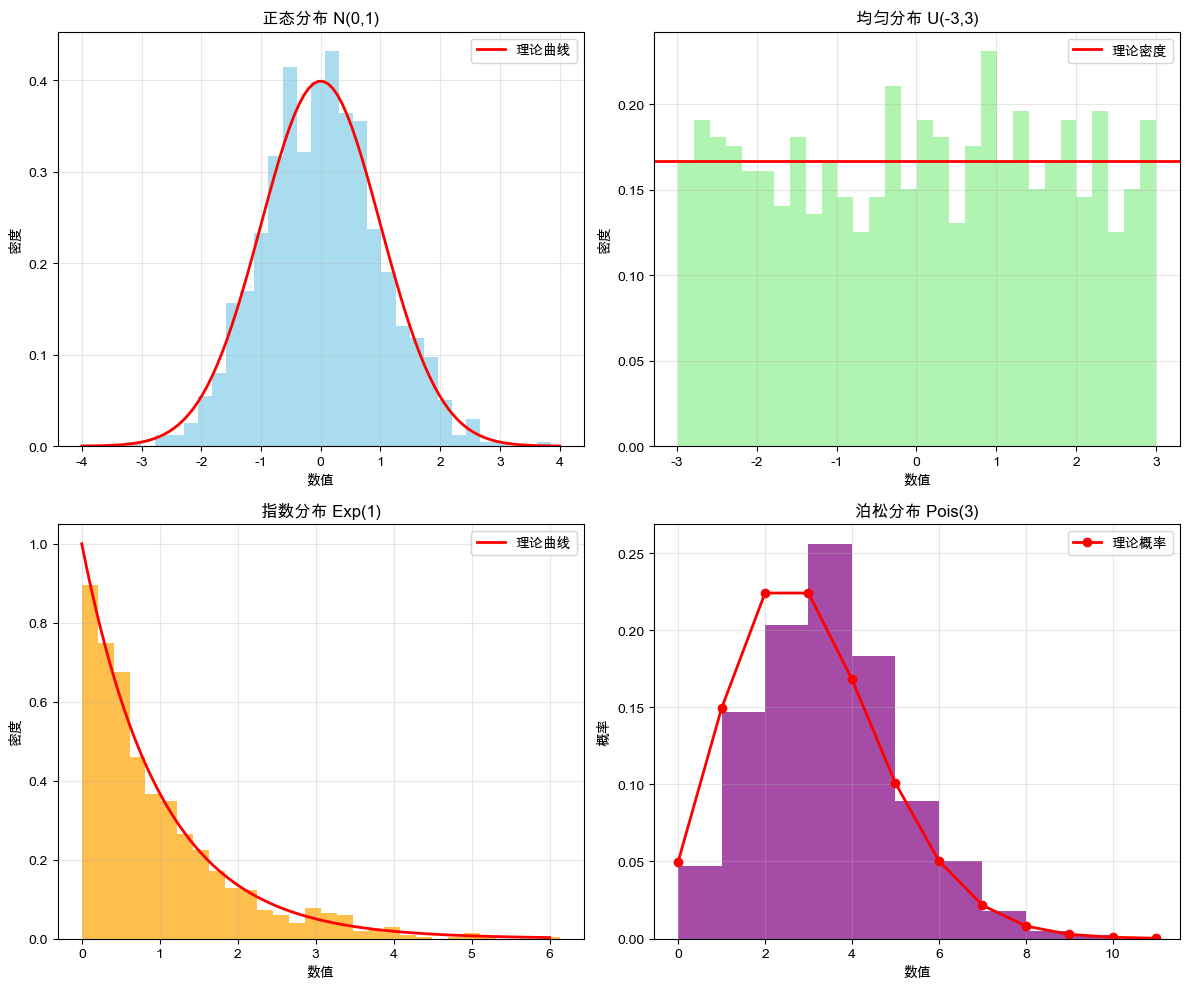


📊 各分布的统计特征:
正态分布:
  均值: 0.02
  标准差: 0.98
  偏度: 0.12

均匀分布:
  均值: 0.02
  标准差: 1.73
  偏度: -0.05

指数分布:
  均值: 0.97
  标准差: 0.94
  偏度: 1.64

泊松分布:
  均值: 2.98
  标准差: 1.64
  偏度: 0.44

💡 分布特点总结:
1. 正态分布：对称，钟形，偏度≈0
2. 均匀分布：平坦，所有值等概率
3. 指数分布：右偏，适合描述等待时间
4. 泊松分布：离散，适合描述计数事件


In [8]:
# 常见概率分布演示
print("📈 常见概率分布演示")
print("="*50)

def demonstrate_distributions():
    """演示四种常见分布"""
    np.random.seed(42)
    
    # 生成不同分布的数据
    normal_data = np.random.normal(0, 1, 1000)
    uniform_data = np.random.uniform(-3, 3, 1000)
    exponential_data = np.random.exponential(1, 1000)
    poisson_data = np.random.poisson(3, 1000)
    
    # 创建2x2的子图
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
    
    # 正态分布
    ax1.hist(normal_data, bins=30, alpha=0.7, color='skyblue', density=True)
    x1 = np.linspace(-4, 4, 100)
    ax1.plot(x1, stats.norm.pdf(x1, 0, 1), 'r-', lw=2, label='理论曲线')
    ax1.set_title('正态分布 N(0,1)')
    ax1.set_xlabel('数值')
    ax1.set_ylabel('密度')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 均匀分布
    ax2.hist(uniform_data, bins=30, alpha=0.7, color='lightgreen', density=True)
    ax2.axhline(y=1/6, color='red', linestyle='-', lw=2, label='理论密度')
    ax2.set_title('均匀分布 U(-3,3)')
    ax2.set_xlabel('数值')
    ax2.set_ylabel('密度')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 指数分布
    ax3.hist(exponential_data, bins=30, alpha=0.7, color='orange', density=True)
    x3 = np.linspace(0, 6, 100)
    ax3.plot(x3, stats.expon.pdf(x3, 0, 1), 'r-', lw=2, label='理论曲线')
    ax3.set_title('指数分布 Exp(1)')
    ax3.set_xlabel('数值')
    ax3.set_ylabel('密度')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 泊松分布
    ax4.hist(poisson_data, bins=range(0, 12), alpha=0.7, color='purple', density=True)
    x4 = np.arange(0, 12)
    ax4.plot(x4, stats.poisson.pmf(x4, 3), 'ro-', lw=2, markersize=6, label='理论概率')
    ax4.set_title('泊松分布 Pois(3)')
    ax4.set_xlabel('数值')
    ax4.set_ylabel('概率')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 输出统计信息
    distributions_info = [
        ('正态分布', normal_data),
        ('均匀分布', uniform_data),
        ('指数分布', exponential_data),
        ('泊松分布', poisson_data)
    ]
    
    print("\n📊 各分布的统计特征:")
    for name, data in distributions_info:
        print(f"{name}:")
        print(f"  均值: {np.mean(data):.2f}")
        print(f"  标准差: {np.std(data):.2f}")
        print(f"  偏度: {stats.skew(data):.2f}")
        print()
    
    print("💡 分布特点总结:")
    print("1. 正态分布：对称，钟形，偏度≈0")
    print("2. 均匀分布：平坦，所有值等概率")
    print("3. 指数分布：右偏，适合描述等待时间")
    print("4. 泊松分布：离散，适合描述计数事件")

demonstrate_distributions()


In [ ]:
# 指数分布和泊松分布的具体应用示例
print("🕐 指数分布和泊松分布的具体应用")
print("="*50)

def exponential_poisson_examples():
    """用具体例子演示指数分布和泊松分布"""
    np.random.seed(42)
    
    print("📞 例子1：客服中心电话系统")
    print("-" * 40)
    
    # 指数分布：电话间隔时间
    # 平均每3分钟接到一个电话，即λ = 1/3
    lambda_rate = 1/3  # 每分钟接到电话的平均次数
    
    # 模拟一天8小时(480分钟)的电话间隔时间
    intervals = np.random.exponential(1/lambda_rate, 1000)
    
    print(f"电话间隔时间统计:")
    print(f"  平均间隔: {np.mean(intervals):.2f} 分钟")
    print(f"  最短间隔: {np.min(intervals):.2f} 分钟")
    print(f"  最长间隔: {np.max(intervals):.2f} 分钟")
    print(f"  90%的电话在 {np.percentile(intervals, 90):.2f} 分钟内到达")
    
    # 泊松分布：每小时接到的电话数
    # 如果平均每3分钟一个电话，那么每小时平均20个电话
    hourly_calls = np.random.poisson(20, 100)  # 模拟100个小时
    
    print(f"\n每小时电话数统计:")
    print(f"  平均每小时: {np.mean(hourly_calls):.1f} 个电话")
    print(f"  最少的小时: {np.min(hourly_calls)} 个电话")
    print(f"  最多的小时: {np.max(hourly_calls)} 个电话")
    print(f"  超过25个电话的小时: {np.sum(hourly_calls > 25)} 个")
    
    print(f"\n🚌 例子2：公交车到站系统")
    print("-" * 40)
    
    # 指数分布：公交车到站间隔
    # 平均每10分钟来一班车
    bus_intervals = np.random.exponential(10, 500)
    
    print(f"公交车间隔时间:")
    print(f"  平均间隔: {np.mean(bus_intervals):.2f} 分钟")
    print(f"  等车超过15分钟的概率: {np.mean(bus_intervals > 15)*100:.1f}%")
    print(f"  等车超过20分钟的概率: {np.mean(bus_intervals > 20)*100:.1f}%")
    
    # 泊松分布：每小时通过的公交车数
    # 如果平均每10分钟一班，每小时平均6班
    hourly_buses = np.random.poisson(6, 100)
    
    print(f"\n每小时公交车数:")
    print(f"  平均每小时: {np.mean(hourly_buses):.1f} 班")
    print(f"  一小时内没有公交车的概率: {np.mean(hourly_buses == 0)*100:.1f}%")
    print(f"  一小时内超过10班车的概率: {np.mean(hourly_buses > 10)*100:.1f}%")
    
    print(f"\n🌐 例子3：网站访问分析")
    print("-" * 40)
    
    # 指数分布：用户访问间隔
    # 平均每2秒有一次访问
    visit_intervals = np.random.exponential(2, 1000)
    
    print(f"网站访问间隔:")
    print(f"  平均间隔: {np.mean(visit_intervals):.2f} 秒")
    print(f"  95%的访问在 {np.percentile(visit_intervals, 95):.2f} 秒内发生")
    
    # 泊松分布：每分钟访问次数
    # 如果平均每2秒一次访问，每分钟平均30次
    minute_visits = np.random.poisson(30, 1000)
    
    print(f"\n每分钟访问次数:")
    print(f"  平均每分钟: {np.mean(minute_visits):.1f} 次访问")
    print(f"  高峰时段(>40次): {np.mean(minute_visits > 40)*100:.1f}%")
    print(f"  低谷时段(<20次): {np.mean(minute_visits < 20)*100:.1f}%")
    
    # 可视化对比
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
    
    # 指数分布：电话间隔时间
    ax1.hist(intervals, bins=30, alpha=0.7, color='skyblue', density=True)
    x1 = np.linspace(0, 20, 100)
    ax1.plot(x1, stats.expon.pdf(x1, scale=3), 'r-', lw=2, label='理论曲线')
    ax1.set_xlabel('间隔时间（分钟）')
    ax1.set_ylabel('密度')
    ax1.set_title('电话间隔时间分布（指数分布）')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 泊松分布：每小时电话数
    ax2.hist(hourly_calls, bins=range(10, 35), alpha=0.7, color='lightcoral', density=True)
    x2 = np.arange(10, 35)
    ax2.plot(x2, stats.poisson.pmf(x2, 20), 'ro-', lw=2, markersize=4, label='理论概率')
    ax2.set_xlabel('每小时电话数')
    ax2.set_ylabel('概率')
    ax2.set_title('每小时电话数分布（泊松分布）')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 指数分布：公交车间隔
    ax3.hist(bus_intervals, bins=30, alpha=0.7, color='lightgreen', density=True)
    x3 = np.linspace(0, 40, 100)
    ax3.plot(x3, stats.expon.pdf(x3, scale=10), 'r-', lw=2, label='理论曲线')
    ax3.set_xlabel('间隔时间（分钟）')
    ax3.set_ylabel('密度')
    ax3.set_title('公交车间隔时间分布（指数分布）')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 泊松分布：每分钟网站访问
    ax4.hist(minute_visits, bins=range(15, 50), alpha=0.7, color='orange', density=True)
    x4 = np.arange(15, 50)
    ax4.plot(x4, stats.poisson.pmf(x4, 30), 'ro-', lw=2, markersize=3, label='理论概率')
    ax4.set_xlabel('每分钟访问次数')
    ax4.set_ylabel('概率')
    ax4.set_title('每分钟网站访问分布（泊松分布）')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 关键理解:")
    print(f"1. 指数分布的'无记忆性'：")
    print(f"   - 已经等了5分钟公交车，再等5分钟的概率和刚开始等5分钟一样")
    print(f"   - 这就是为什么有时候会等很久！")
    
    print(f"\n2. 泊松分布的'稀有事件'特性：")
    print(f"   - 描述在固定时间内发生的事件次数")
    print(f"   - 事件发生相互独立")
    print(f"   - 平均发生率保持稳定")
    
    print(f"\n3. 两个分布的关系：")
    print(f"   - 如果事件间隔服从指数分布")
    print(f"   - 那么固定时间内的事件次数就服从泊松分布")
    print(f"   - 它们是一对'孪生兄弟'！")
    
    print(f"\n4. 实际应用价值：")
    print(f"   - 容量规划：需要多少客服人员？")
    print(f"   - 资源配置：服务器需要多大处理能力？")
    print(f"   - 风险评估：系统过载的概率是多少？")

exponential_poisson_examples()


🏠 日常生活中的指数分布和泊松分布
☕ 例子1：咖啡店排队系统
----------------------------------------
顾客到达间隔分析:
  平均间隔: 1.95 分钟
  连续5分钟没顾客的概率: 7.7%
  1分钟内就有顾客的概率: 43.0%

每10分钟顾客数:
  平均: 4.8 个顾客
  10分钟内没有顾客: 0.0%
  10分钟内超过8个顾客: 6.0%

📱 例子2：手机APP推送通知
----------------------------------------
推送通知间隔:
  平均间隔: 29.74 分钟
  1小时内没收到推送的概率: 15.0%
  10分钟内就收到推送的概率: 31.0%

每小时推送数:
  平均: 2.1 条
  一小时内没有推送: 13.0%
  一小时内超过5条推送: 2.0%

🚗 例子3：停车场车位使用
----------------------------------------
停车时长分析:
  平均停车: 2.03 小时
  停车超过4小时: 13.0%
  停车不到1小时: 37.4%

每小时离开车辆数:
  平均: 7.8 辆
  一小时内没车离开: 0.0%
  一小时内超过12辆车离开: 3.0%


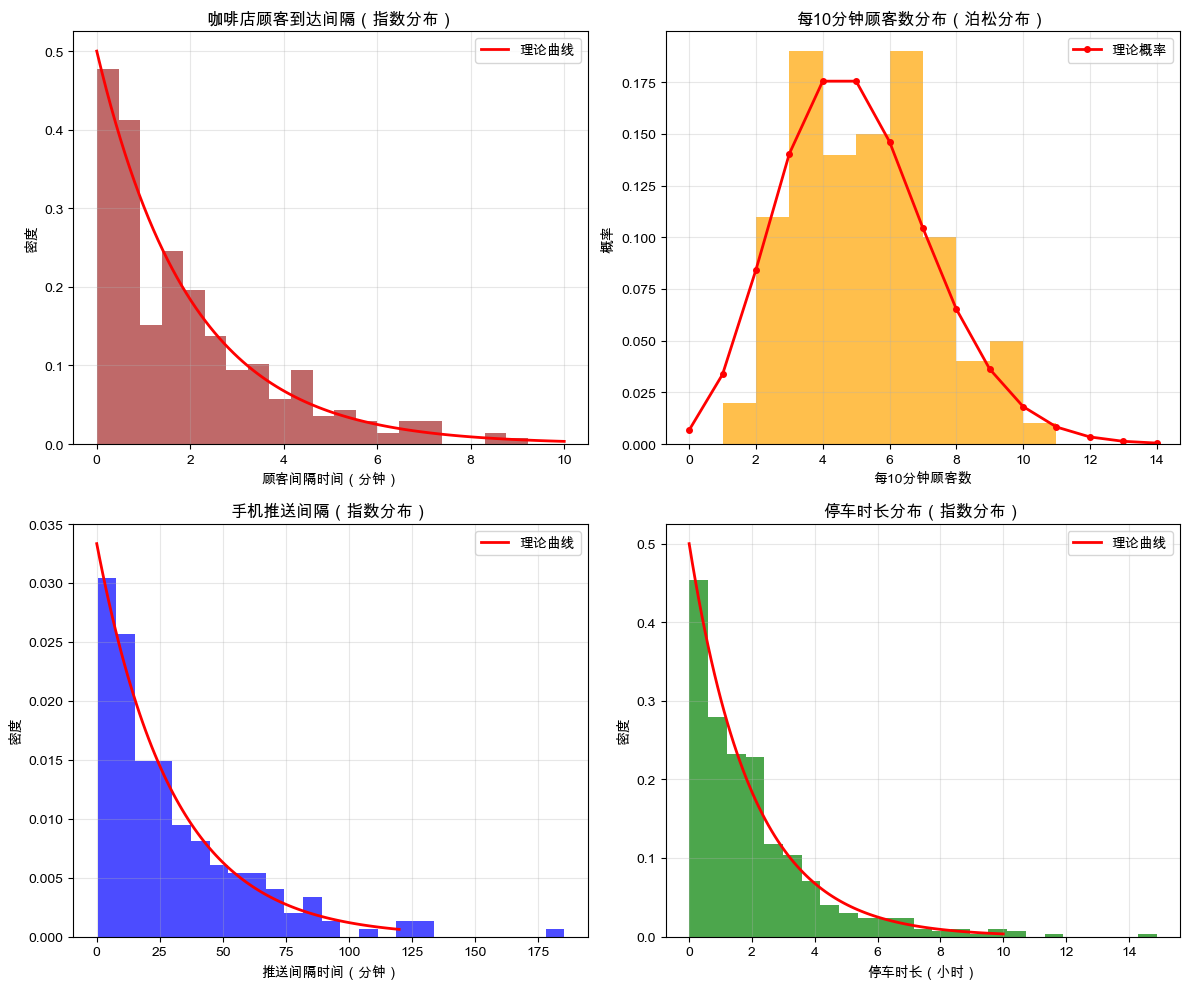


🎯 生活中的直观理解:
1. 指数分布 = '等待时间':
   - 等公交车、等电梯、等外卖
   - 大部分时间等得不久，偶尔等很久
   - '无记忆性'：已经等了很久不代表马上就来

2. 泊松分布 = '稀有事件计数':
   - 一小时内收到的短信数
   - 一天内快递员按门铃的次数
   - 一周内朋友圈点赞数

3. 为什么这很重要？
   - 帮助我们理解随机性的规律
   - 在不确定中找到确定性
   - 这就是概率思维的力量！

4. 机器学习中的应用:
   - 用户行为建模：用户何时会点击？
   - 系统设计：需要多大的处理能力？
   - 异常检测：这个访问量是否异常？


In [9]:
# 更贴近日常生活的例子
print("🏠 日常生活中的指数分布和泊松分布")
print("="*50)

def daily_life_examples():
    """用日常生活例子帮助理解"""
    np.random.seed(42)
    
    print("☕ 例子1：咖啡店排队系统")
    print("-" * 40)
    
    # 指数分布：顾客到达间隔时间
    # 平均每2分钟来一个顾客
    customer_intervals = np.random.exponential(2, 300)
    
    print(f"顾客到达间隔分析:")
    print(f"  平均间隔: {np.mean(customer_intervals):.2f} 分钟")
    print(f"  连续5分钟没顾客的概率: {np.mean(customer_intervals > 5)*100:.1f}%")
    print(f"  1分钟内就有顾客的概率: {np.mean(customer_intervals < 1)*100:.1f}%")
    
    # 泊松分布：每10分钟来的顾客数
    # 如果平均每2分钟一个顾客，10分钟平均5个顾客
    customers_per_10min = np.random.poisson(5, 100)
    
    print(f"\n每10分钟顾客数:")
    print(f"  平均: {np.mean(customers_per_10min):.1f} 个顾客")
    print(f"  10分钟内没有顾客: {np.mean(customers_per_10min == 0)*100:.1f}%")
    print(f"  10分钟内超过8个顾客: {np.mean(customers_per_10min > 8)*100:.1f}%")
    
    print(f"\n📱 例子2：手机APP推送通知")
    print("-" * 40)
    
    # 指数分布：推送通知间隔
    # 平均每30分钟收到一条推送
    notification_intervals = np.random.exponential(30, 200)
    
    print(f"推送通知间隔:")
    print(f"  平均间隔: {np.mean(notification_intervals):.2f} 分钟")
    print(f"  1小时内没收到推送的概率: {np.mean(notification_intervals > 60)*100:.1f}%")
    print(f"  10分钟内就收到推送的概率: {np.mean(notification_intervals < 10)*100:.1f}%")
    
    # 泊松分布：每小时推送数
    # 如果平均每30分钟一条，每小时平均2条
    hourly_notifications = np.random.poisson(2, 100)
    
    print(f"\n每小时推送数:")
    print(f"  平均: {np.mean(hourly_notifications):.1f} 条")
    print(f"  一小时内没有推送: {np.mean(hourly_notifications == 0)*100:.1f}%")
    print(f"  一小时内超过5条推送: {np.mean(hourly_notifications > 5)*100:.1f}%")
    
    print(f"\n🚗 例子3：停车场车位使用")
    print("-" * 40)
    
    # 指数分布：车辆停车时长
    # 平均停车2小时
    parking_duration = np.random.exponential(2, 500)
    
    print(f"停车时长分析:")
    print(f"  平均停车: {np.mean(parking_duration):.2f} 小时")
    print(f"  停车超过4小时: {np.mean(parking_duration > 4)*100:.1f}%")
    print(f"  停车不到1小时: {np.mean(parking_duration < 1)*100:.1f}%")
    
    # 泊松分布：每小时离开的车辆数
    # 如果平均停车2小时，每小时平均有一定数量车辆离开
    hourly_departures = np.random.poisson(8, 100)
    
    print(f"\n每小时离开车辆数:")
    print(f"  平均: {np.mean(hourly_departures):.1f} 辆")
    print(f"  一小时内没车离开: {np.mean(hourly_departures == 0)*100:.1f}%")
    print(f"  一小时内超过12辆车离开: {np.mean(hourly_departures > 12)*100:.1f}%")
    
    # 可视化日常例子
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
    
    # 咖啡店顾客间隔
    ax1.hist(customer_intervals, bins=20, alpha=0.7, color='brown', density=True)
    x1 = np.linspace(0, 10, 100)
    ax1.plot(x1, stats.expon.pdf(x1, scale=2), 'r-', lw=2, label='理论曲线')
    ax1.set_xlabel('顾客间隔时间（分钟）')
    ax1.set_ylabel('密度')
    ax1.set_title('咖啡店顾客到达间隔（指数分布）')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 每10分钟顾客数
    ax2.hist(customers_per_10min, bins=range(0, 15), alpha=0.7, color='orange', density=True)
    x2 = np.arange(0, 15)
    ax2.plot(x2, stats.poisson.pmf(x2, 5), 'ro-', lw=2, markersize=4, label='理论概率')
    ax2.set_xlabel('每10分钟顾客数')
    ax2.set_ylabel('概率')
    ax2.set_title('每10分钟顾客数分布（泊松分布）')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 推送通知间隔
    ax3.hist(notification_intervals, bins=25, alpha=0.7, color='blue', density=True)
    x3 = np.linspace(0, 120, 100)
    ax3.plot(x3, stats.expon.pdf(x3, scale=30), 'r-', lw=2, label='理论曲线')
    ax3.set_xlabel('推送间隔时间（分钟）')
    ax3.set_ylabel('密度')
    ax3.set_title('手机推送间隔（指数分布）')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 停车时长
    ax4.hist(parking_duration, bins=25, alpha=0.7, color='green', density=True)
    x4 = np.linspace(0, 10, 100)
    ax4.plot(x4, stats.expon.pdf(x4, scale=2), 'r-', lw=2, label='理论曲线')
    ax4.set_xlabel('停车时长（小时）')
    ax4.set_ylabel('密度')
    ax4.set_title('停车时长分布（指数分布）')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🎯 生活中的直观理解:")
    print(f"1. 指数分布 = '等待时间':")
    print(f"   - 等公交车、等电梯、等外卖")
    print(f"   - 大部分时间等得不久，偶尔等很久")
    print(f"   - '无记忆性'：已经等了很久不代表马上就来")
    
    print(f"\n2. 泊松分布 = '稀有事件计数':")
    print(f"   - 一小时内收到的短信数")
    print(f"   - 一天内快递员按门铃的次数")
    print(f"   - 一周内朋友圈点赞数")
    
    print(f"\n3. 为什么这很重要？")
    print(f"   - 帮助我们理解随机性的规律")
    print(f"   - 在不确定中找到确定性")
    print(f"   - 这就是概率思维的力量！")
    
    print(f"\n4. 机器学习中的应用:")
    print(f"   - 用户行为建模：用户何时会点击？")
    print(f"   - 系统设计：需要多大的处理能力？")
    print(f"   - 异常检测：这个访问量是否异常？")

daily_life_examples()


In [ ]:
# 深入理解中心极限定理的实际应用
print("🧠 中心极限定理的实际应用价值")
print("="*50)

def clt_practical_applications():
    """演示中心极限定理在实际推断中的应用"""
    np.random.seed(42)
    
    print("📊 案例1：民意调查 - 从样本推断总体")
    print("-" * 50)
    
    # 模拟真实总体：全国支持率为52%
    true_support_rate = 0.52
    population_size = 1000000  # 100万人的总体
    
    # 总体数据（1=支持，0=不支持）
    population = np.random.binomial(1, true_support_rate, population_size)
    
    print(f"真实总体支持率: {true_support_rate*100:.1f}%")
    print(f"总体规模: {population_size:,} 人")
    
    # 进行多次抽样调查
    sample_sizes = [50, 100, 500, 1000]
    n_surveys = 1000  # 进行1000次调查
    
    print(f"\n🔍 不同样本量的调查结果:")
    
    for sample_size in sample_sizes:
        # 进行1000次抽样调查
        sample_means = []
        for _ in range(n_surveys):
            sample = np.random.choice(population, size=sample_size, replace=False)
            sample_means.append(np.mean(sample))
        
        sample_means = np.array(sample_means)
        
        # 计算统计量
        mean_estimate = np.mean(sample_means)
        std_estimate = np.std(sample_means)
        
        # 根据中心极限定理计算理论标准误
        theoretical_se = np.sqrt(true_support_rate * (1 - true_support_rate) / sample_size)
        
        # 计算95%置信区间
        ci_lower = mean_estimate - 1.96 * std_estimate
        ci_upper = mean_estimate + 1.96 * std_estimate
        
        print(f"\n样本量 {sample_size}:")
        print(f"  平均估计支持率: {mean_estimate*100:.2f}%")
        print(f"  标准误差: {std_estimate:.4f}")
        print(f"  理论标准误差: {theoretical_se:.4f}")
        print(f"  95%置信区间: [{ci_lower*100:.2f}%, {ci_upper*100:.2f}%]")
        print(f"  置信区间包含真值: {'是' if ci_lower <= true_support_rate <= ci_upper else '否'}")
    
    print(f"\n🏭 案例2：质量控制 - 产品合格率推断")
    print("-" * 50)
    
    # 模拟生产线：真实合格率95%
    true_quality_rate = 0.95
    
    # 抽检不同数量的产品
    inspection_sizes = [30, 50, 100, 200]
    
    print(f"真实产品合格率: {true_quality_rate*100:.1f}%")
    
    for inspect_size in inspection_sizes:
        # 进行500次抽检
        quality_estimates = []
        for _ in range(500):
            # 抽检产品（1=合格，0=不合格）
            sample = np.random.binomial(1, true_quality_rate, inspect_size)
            quality_estimates.append(np.mean(sample))
        
        quality_estimates = np.array(quality_estimates)
        
        # 计算统计量
        mean_quality = np.mean(quality_estimates)
        std_quality = np.std(quality_estimates)
        
        # 计算99%置信区间（质量控制要求更高置信度）
        ci_lower = mean_quality - 2.576 * std_quality  # 99%置信区间
        ci_upper = mean_quality + 2.576 * std_quality
        
        print(f"\n抽检 {inspect_size} 个产品:")
        print(f"  平均合格率估计: {mean_quality*100:.2f}%")
        print(f"  标准误差: {std_quality:.4f}")
        print(f"  99%置信区间: [{ci_lower*100:.2f}%, {ci_upper*100:.2f}%]")
        
        # 判断是否需要停产检查（如果置信区间下限低于90%）
        if ci_lower < 0.90:
            print(f"  ⚠️  建议：置信区间下限 < 90%，需要检查生产线")
        else:
            print(f"  ✅ 生产线质量正常")
    
    print(f"\n💊 案例3：医学研究 - 药物效果评估")
    print("-" * 50)
    
    # 模拟临床试验：新药真实有效率为65%
    true_efficacy = 0.65
    
    # 不同规模的临床试验
    trial_sizes = [50, 100, 200, 500]
    
    print(f"新药真实有效率: {true_efficacy*100:.1f}%")
    
    for trial_size in trial_sizes:
        # 进行多次模拟试验
        efficacy_estimates = []
        for _ in range(300):
            # 临床试验结果（1=有效，0=无效）
            results = np.random.binomial(1, true_efficacy, trial_size)
            efficacy_estimates.append(np.mean(results))
        
        efficacy_estimates = np.array(efficacy_estimates)
        
        # 计算统计量
        mean_efficacy = np.mean(efficacy_estimates)
        std_efficacy = np.std(efficacy_estimates)
        
        # 计算95%置信区间
        ci_lower = mean_efficacy - 1.96 * std_efficacy
        ci_upper = mean_efficacy + 1.96 * std_efficacy
        
        print(f"\n试验规模 {trial_size} 人:")
        print(f"  平均有效率估计: {mean_efficacy*100:.2f}%")
        print(f"  95%置信区间: [{ci_lower*100:.2f}%, {ci_upper*100:.2f}%]")
        
        # 判断药物是否显著有效（需要证明有效率 > 50%）
        if ci_lower > 0.50:
            print(f"  ✅ 结论：药物显著有效（置信区间下限 > 50%）")
        else:
            print(f"  ❌ 结论：无法证明药物显著有效")
    
    # 可视化中心极限定理的应用
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
    
    # 不同样本量的调查结果分布
    sample_sizes = [50, 100, 500, 1000]
    colors = ['red', 'blue', 'green', 'purple']
    
    for i, (size, color) in enumerate(zip(sample_sizes, colors)):
        sample_means = []
        for _ in range(1000):
            sample = np.random.choice(population, size=size, replace=False)
            sample_means.append(np.mean(sample))
        
        ax1.hist(sample_means, bins=30, alpha=0.6, label=f'n={size}', 
                color=color, density=True)
    
    ax1.axvline(true_support_rate, color='black', linestyle='--', 
                linewidth=2, label='真实支持率')
    ax1.set_xlabel('样本支持率')
    ax1.set_ylabel('密度')
    ax1.set_title('不同样本量的支持率分布')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 标准误差随样本量变化
    sizes = np.arange(10, 1001, 10)
    standard_errors = np.sqrt(true_support_rate * (1 - true_support_rate) / sizes)
    
    ax2.plot(sizes, standard_errors, 'b-', linewidth=2)
    ax2.set_xlabel('样本量')
    ax2.set_ylabel('标准误差')
    ax2.set_title('标准误差随样本量的变化')
    ax2.grid(True, alpha=0.3)
    
    # 置信区间宽度随样本量变化
    ci_widths = 2 * 1.96 * standard_errors  # 95%置信区间宽度
    
    ax3.plot(sizes, ci_widths * 100, 'r-', linewidth=2)
    ax3.set_xlabel('样本量')
    ax3.set_ylabel('置信区间宽度 (%)')
    ax3.set_title('95%置信区间宽度随样本量的变化')
    ax3.grid(True, alpha=0.3)
    
    # 样本量与推断精度的关系
    precisions = 1 / standard_errors  # 精度 = 1/标准误差
    
    ax4.plot(sizes, precisions, 'g-', linewidth=2)
    ax4.set_xlabel('样本量')
    ax4.set_ylabel('推断精度')
    ax4.set_title('推断精度随样本量的变化')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🎯 中心极限定理的实际价值:")
    print(f"1. 让我们能够用小样本推断大总体")
    print(f"2. 提供了置信区间计算的理论基础")
    print(f"3. 解释了为什么样本量越大，推断越准确")
    print(f"4. 是所有统计推断方法的数学基础")
    
    print(f"\n💡 关键理解:")
    print(f"- 不管总体分布如何，样本均值都趋于正态分布")
    print(f"- 这让我们能够计算概率和置信区间")
    print(f"- 样本量越大，推断越精确（标准误差 ∝ 1/√n）")
    print(f"- 这就是统计学的核心魔法！")

clt_practical_applications()


## 4️⃣ 抽样与推断

### 什么是抽样？

**抽样** = 从大数据中取小样本进行分析

### 为什么需要抽样？

在实际工作中，我们经常面临这些情况：
- **成本限制**：调查全国人口太昂贵
- **时间限制**：分析全部数据太耗时
- **物理限制**：无法获得全部数据（如产品质检）

### 抽样的核心思想

- **样本代表总体**：通过小样本推断大总体
- **随机性很重要**：确保样本无偏
- **样本量影响精度**：样本越大，推断越准确

### 中心极限定理

这是统计学最重要的定理之一：
- **无论总体分布如何**，样本均值的分布趋于正态分布
- **样本量越大**，这个趋势越明显
- **这就是为什么**我们可以用样本推断总体！


🎯 中心极限定理演示
总体分布特征:
  均值: 1.95
  标准差: 1.95
  偏度: 1.92 (>0表示右偏)

样本量 5:
  样本均值的均值: 1.96
  样本均值的标准差: 0.86
  理论标准差: 0.87
  偏度: 0.79

样本量 30:
  样本均值的均值: 1.96
  样本均值的标准差: 0.35
  理论标准差: 0.36
  偏度: 0.35

样本量 100:
  样本均值的均值: 1.96
  样本均值的标准差: 0.20
  理论标准差: 0.19
  偏度: 0.14


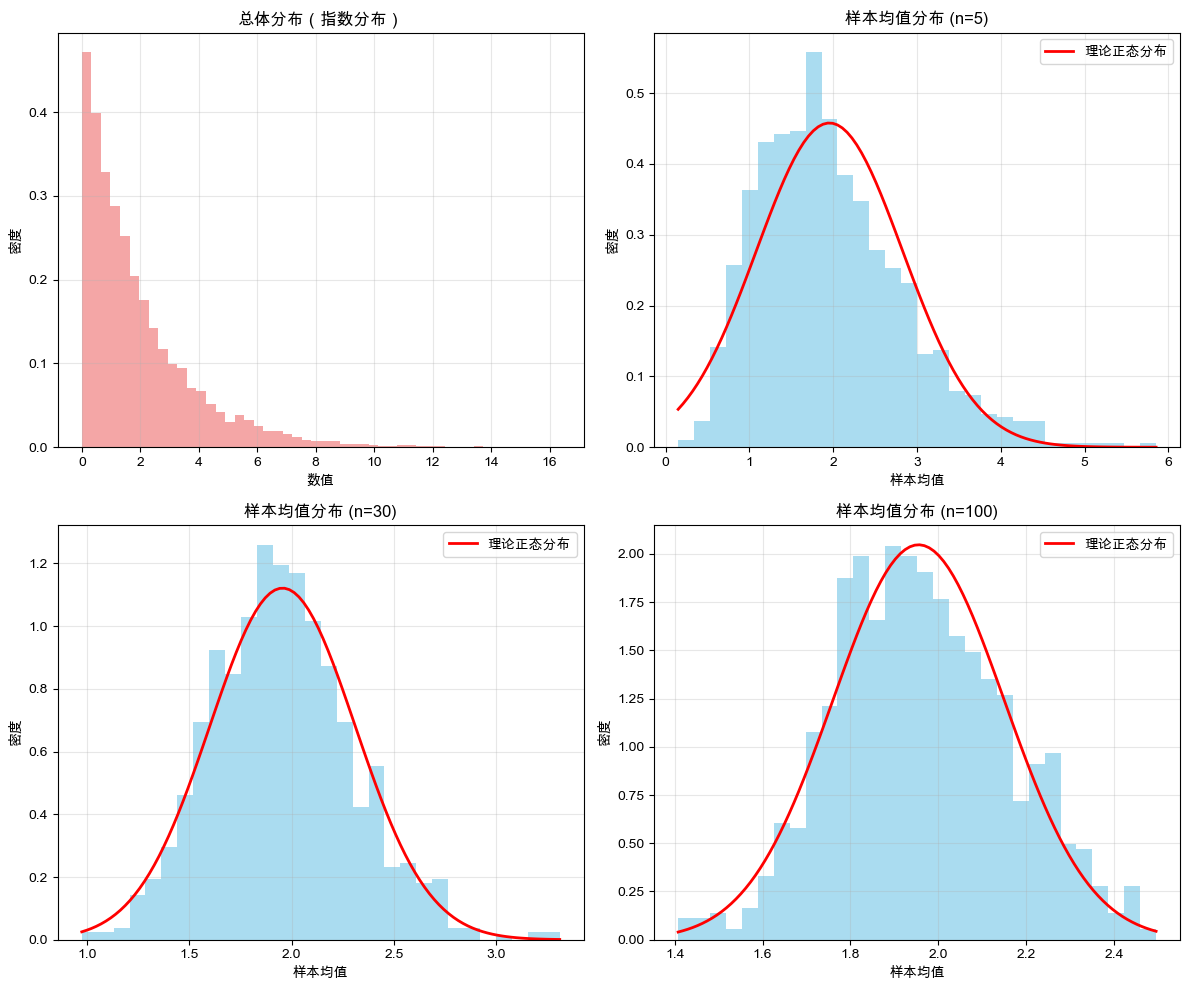


💡 中心极限定理的关键观察:
1. 总体是右偏的指数分布
2. 样本量越大，样本均值分布越接近正态分布
3. 样本均值的均值 ≈ 总体均值
4. 样本均值的标准差 = 总体标准差 / √样本量
5. 这就是统计推断的数学基础！


In [10]:
# 中心极限定理演示
print("🎯 中心极限定理演示")
print("="*50)

def demonstrate_central_limit_theorem():
    """演示中心极限定理"""
    np.random.seed(42)
    
    # 创建一个非正态分布的总体（指数分布）
    population = np.random.exponential(2, 10000)
    
    print(f"总体分布特征:")
    print(f"  均值: {np.mean(population):.2f}")
    print(f"  标准差: {np.std(population):.2f}")
    print(f"  偏度: {stats.skew(population):.2f} (>0表示右偏)")
    
    # 不同样本量的抽样实验
    sample_sizes = [5, 30, 100]
    n_samples = 1000  # 每种样本量抽取1000次
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # 绘制总体分布
    axes[0, 0].hist(population, bins=50, alpha=0.7, color='lightcoral', density=True)
    axes[0, 0].set_title('总体分布（指数分布）')
    axes[0, 0].set_xlabel('数值')
    axes[0, 0].set_ylabel('密度')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 对每种样本量进行抽样实验
    for i, sample_size in enumerate(sample_sizes):
        sample_means = []
        
        # 进行1000次抽样
        for _ in range(n_samples):
            sample = np.random.choice(population, size=sample_size, replace=False)
            sample_means.append(np.mean(sample))
        
        sample_means = np.array(sample_means)
        
        # 绘制样本均值分布
        row = (i + 1) // 2
        col = (i + 1) % 2
        
        axes[row, col].hist(sample_means, bins=30, alpha=0.7, color='skyblue', density=True)
        
        # 叠加理论正态分布
        x = np.linspace(sample_means.min(), sample_means.max(), 100)
        theoretical_mean = np.mean(population)
        theoretical_std = np.std(population) / np.sqrt(sample_size)
        theoretical_normal = stats.norm.pdf(x, theoretical_mean, theoretical_std)
        axes[row, col].plot(x, theoretical_normal, 'r-', lw=2, label='理论正态分布')
        
        axes[row, col].set_title(f'样本均值分布 (n={sample_size})')
        axes[row, col].set_xlabel('样本均值')
        axes[row, col].set_ylabel('密度')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)
        
        # 输出统计信息
        print(f"\n样本量 {sample_size}:")
        print(f"  样本均值的均值: {np.mean(sample_means):.2f}")
        print(f"  样本均值的标准差: {np.std(sample_means):.2f}")
        print(f"  理论标准差: {np.std(population) / np.sqrt(sample_size):.2f}")
        print(f"  偏度: {stats.skew(sample_means):.2f}")
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 中心极限定理的关键观察:")
    print("1. 总体是右偏的指数分布")
    print("2. 样本量越大，样本均值分布越接近正态分布")
    print("3. 样本均值的均值 ≈ 总体均值")
    print("4. 样本均值的标准差 = 总体标准差 / √样本量")
    print("5. 这就是统计推断的数学基础！")

demonstrate_central_limit_theorem()


## 5️⃣ 机器学习中的应用

### 概率统计在机器学习中的核心作用

1. **数据预处理**
   - 异常值检测（基于正态分布的3σ原则）
   - 数据标准化（基于均值和标准差）
   - 缺失值处理（基于概率分布）

2. **特征工程**
   - 特征分布分析
   - 特征变换（如对数变换处理右偏数据）
   - 特征选择（基于统计显著性）

3. **模型训练**
   - 损失函数设计（基于概率原理）
   - 正则化（防止过拟合的统计方法）
   - 梯度下降（基于统计优化）

4. **模型评估**
   - 准确率、精确率、召回率（都是概率概念）
   - 置信区间估计
   - A/B测试验证模型效果

5. **预测与决策**
   - 预测概率输出
   - 不确定性量化
   - 风险评估


🤖 机器学习应用示例
📊 场景1：异常值检测
------------------------------
数据均值: 100.62
数据标准差: 17.14
异常值阈值: ±51.41
检测到的异常值: [157.79097236 200.         250.          30.         300.        ]
异常值比例: 0.5%

📈 场景2：数据标准化
------------------------------
标准化前:
特征1（收入）: 均值=1032, 标准差=189
特征2（年龄）: 均值=25.5, 标准差=5.5
特征3（评分）: 均值=0.81, 标准差=0.20

标准化后:
特征1: 均值=0.00, 标准差=1.00
特征2: 均值=0.00, 标准差=1.00
特征3: 均值=-0.00, 标准差=1.00

🎯 场景3：模型预测概率
------------------------------
总预测数: 1000
高置信度预测 (>0.8 或 <0.2): 196 个 (19.6%)
低置信度预测 (0.4-0.6): 322 个 (32.2%)
平均预测概率: 0.504


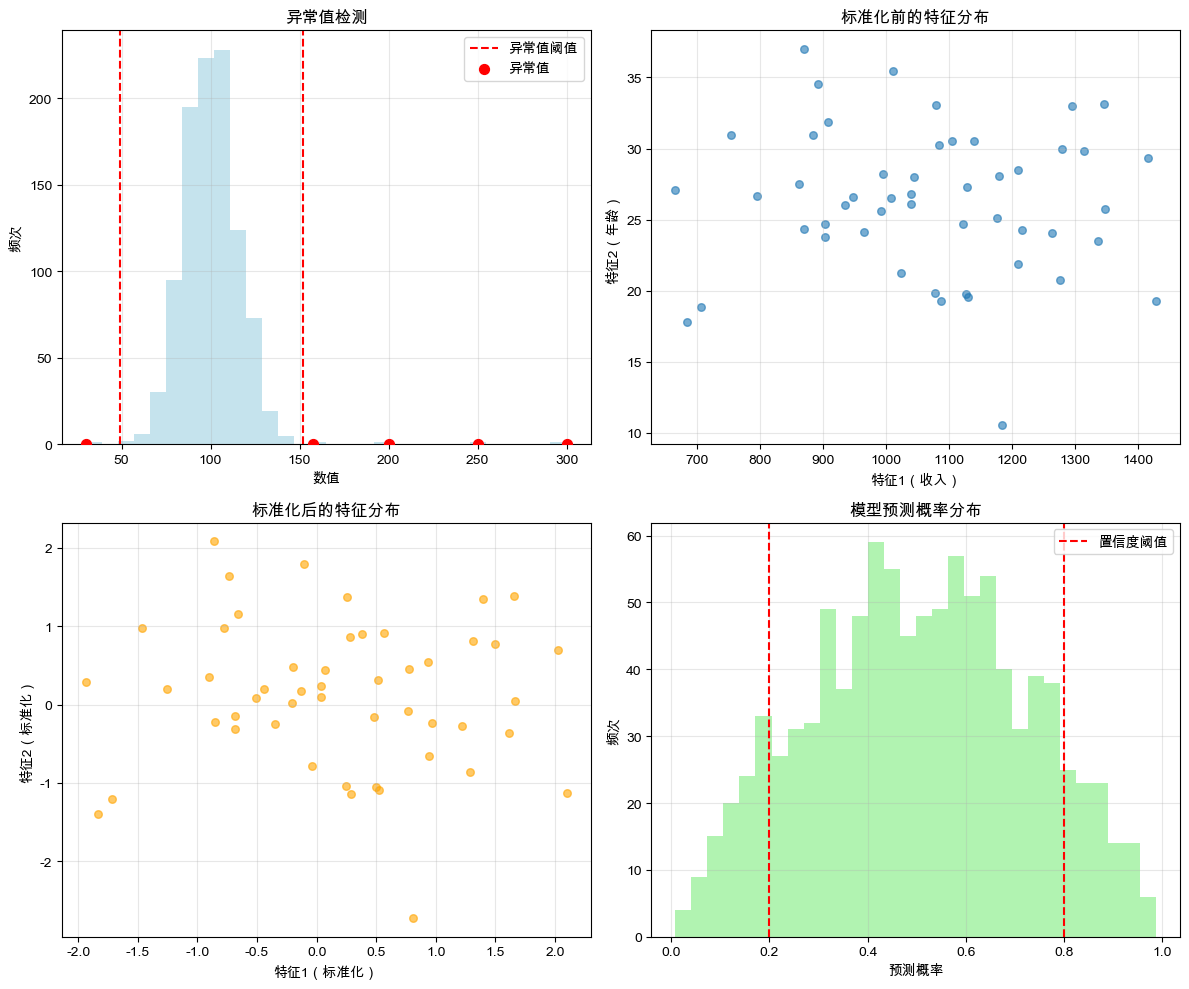


💡 关键理解:
1. 异常值检测帮助清洗数据，提高模型质量
2. 标准化使不同量纲的特征可以公平比较
3. 预测概率帮助评估模型的不确定性
4. 这些都是概率统计在机器学习中的直接应用


In [11]:
# 机器学习应用示例
print("🤖 机器学习应用示例")
print("="*50)

def ml_applications_demo():
    """演示概率统计在机器学习中的应用"""
    np.random.seed(42)
    
    print("📊 场景1：异常值检测")
    print("-" * 30)
    
    # 生成正常数据和异常数据
    normal_data = np.random.normal(100, 15, 1000)
    outliers = np.array([50, 200, 250, 30, 300])
    all_data = np.concatenate([normal_data, outliers])
    
    # 基于3σ原则检测异常值
    mean_val = np.mean(all_data)
    std_val = np.std(all_data)
    threshold = 3 * std_val
    
    outlier_mask = np.abs(all_data - mean_val) > threshold
    detected_outliers = all_data[outlier_mask]
    
    print(f"数据均值: {mean_val:.2f}")
    print(f"数据标准差: {std_val:.2f}")
    print(f"异常值阈值: ±{threshold:.2f}")
    print(f"检测到的异常值: {detected_outliers}")
    print(f"异常值比例: {len(detected_outliers)/len(all_data)*100:.1f}%")
    
    print(f"\n📈 场景2：数据标准化")
    print("-" * 30)
    
    # 原始特征数据（不同量纲）
    feature1 = np.random.normal(1000, 200, 100)  # 收入（元）
    feature2 = np.random.normal(25, 5, 100)      # 年龄（岁）
    feature3 = np.random.normal(0.8, 0.2, 100)   # 信用评分（0-1）
    
    print("标准化前:")
    print(f"特征1（收入）: 均值={np.mean(feature1):.0f}, 标准差={np.std(feature1):.0f}")
    print(f"特征2（年龄）: 均值={np.mean(feature2):.1f}, 标准差={np.std(feature2):.1f}")
    print(f"特征3（评分）: 均值={np.mean(feature3):.2f}, 标准差={np.std(feature3):.2f}")
    
    # Z-score标准化
    feature1_std = (feature1 - np.mean(feature1)) / np.std(feature1)
    feature2_std = (feature2 - np.mean(feature2)) / np.std(feature2)
    feature3_std = (feature3 - np.mean(feature3)) / np.std(feature3)
    
    print(f"\n标准化后:")
    print(f"特征1: 均值={np.mean(feature1_std):.2f}, 标准差={np.std(feature1_std):.2f}")
    print(f"特征2: 均值={np.mean(feature2_std):.2f}, 标准差={np.std(feature2_std):.2f}")
    print(f"特征3: 均值={np.mean(feature3_std):.2f}, 标准差={np.std(feature3_std):.2f}")
    
    print(f"\n🎯 场景3：模型预测概率")
    print("-" * 30)
    
    # 模拟分类模型的预测概率
    predictions = np.random.beta(2, 2, 1000)  # 生成0-1之间的概率
    
    # 分析预测置信度
    high_confidence = predictions[(predictions > 0.8) | (predictions < 0.2)]
    medium_confidence = predictions[(predictions >= 0.4) & (predictions <= 0.6)]
    
    print(f"总预测数: {len(predictions)}")
    print(f"高置信度预测 (>0.8 或 <0.2): {len(high_confidence)} 个 ({len(high_confidence)/len(predictions)*100:.1f}%)")
    print(f"低置信度预测 (0.4-0.6): {len(medium_confidence)} 个 ({len(medium_confidence)/len(predictions)*100:.1f}%)")
    print(f"平均预测概率: {np.mean(predictions):.3f}")
    
    # 可视化
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
    
    # 异常值检测可视化
    ax1.hist(all_data, bins=30, alpha=0.7, color='lightblue')
    ax1.axvline(mean_val - threshold, color='red', linestyle='--', label='异常值阈值')
    ax1.axvline(mean_val + threshold, color='red', linestyle='--')
    ax1.scatter(detected_outliers, np.zeros_like(detected_outliers), color='red', s=50, label='异常值', zorder=5)
    ax1.set_title('异常值检测')
    ax1.set_xlabel('数值')
    ax1.set_ylabel('频次')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 标准化前后对比
    ax2.scatter(feature1[:50], feature2[:50], alpha=0.6, label='标准化前', s=30)
    ax2.set_xlabel('特征1（收入）')
    ax2.set_ylabel('特征2（年龄）')
    ax2.set_title('标准化前的特征分布')
    ax2.grid(True, alpha=0.3)
    
    ax3.scatter(feature1_std[:50], feature2_std[:50], alpha=0.6, label='标准化后', s=30, color='orange')
    ax3.set_xlabel('特征1（标准化）')
    ax3.set_ylabel('特征2（标准化）')
    ax3.set_title('标准化后的特征分布')
    ax3.grid(True, alpha=0.3)
    
    # 预测概率分布
    ax4.hist(predictions, bins=30, alpha=0.7, color='lightgreen')
    ax4.axvline(0.2, color='red', linestyle='--', label='置信度阈值')
    ax4.axvline(0.8, color='red', linestyle='--')
    ax4.set_xlabel('预测概率')
    ax4.set_ylabel('频次')
    ax4.set_title('模型预测概率分布')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 关键理解:")
    print(f"1. 异常值检测帮助清洗数据，提高模型质量")
    print(f"2. 标准化使不同量纲的特征可以公平比较")
    print(f"3. 预测概率帮助评估模型的不确定性")
    print(f"4. 这些都是概率统计在机器学习中的直接应用")

ml_applications_demo()


## 🎯 今日学习总结

### 核心概念回顾

1. **概率 = 不确定性量化**
   - 概率是事件发生的可能性大小（0-1之间）
   - 大数定律：试验次数越多，结果越接近理论值
   - 这是机器学习需要大量数据的数学基础

2. **统计 = 数据规律发现**
   - 均值、中位数、标准差等统计量描述数据特征
   - 不同统计量对异常值的敏感性不同
   - 这是数据分析和特征工程的基础

3. **分布 = 数据模式描述**
   - 正态分布：钟形，对称，自然界最常见
   - 均匀分布：平坦，等概率
   - 指数分布：右偏，描述等待时间
   - 泊松分布：离散，描述稀有事件

4. **抽样 = 大数据处理基础**
   - 通过样本推断总体
   - 中心极限定理：样本均值趋于正态分布
   - 这是统计推断和机器学习的理论基础

### 机器学习应用要点

- **数据预处理**：异常值检测、数据标准化
- **特征工程**：特征分布分析、特征变换
- **模型评估**：准确率、置信区间、A/B测试
- **预测决策**：概率输出、不确定性量化

### 明天预告

第5天将学习**线性代数基础**，包括：
- 向量空间和线性变换
- 矩阵分解（特征值、奇异值）
- 线性代数在机器学习中的应用
- 降维和主成分分析

### 学习建议

1. **重点理解概念**：不要死记公式，要理解背后的直观含义
2. **多做练习**：通过编程练习加深理解
3. **联系实际**：思考这些概念在实际项目中的应用
4. **循序渐进**：概率统计是后续学习的基础，要打牢基础

**记住**：概率统计不是纯数学，而是解决实际问题的工具！
